In [85]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [86]:
X = pd.read_csv('Datasets/Diabetes_XTrain.csv')
Y = pd.read_csv('Datasets/Diabetes_YTrain.csv')

In [87]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [88]:
Y

,Outcome
0,1
1,0
2,1
3,1
4,0
...,...
1147,0
1148,1
1149,0
1150,0


In [89]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.327336,31.499222,20.276997,15.886951,109.146105,8.131392,0.336764,11.872976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


# Correlation Analysis and Feature Selection

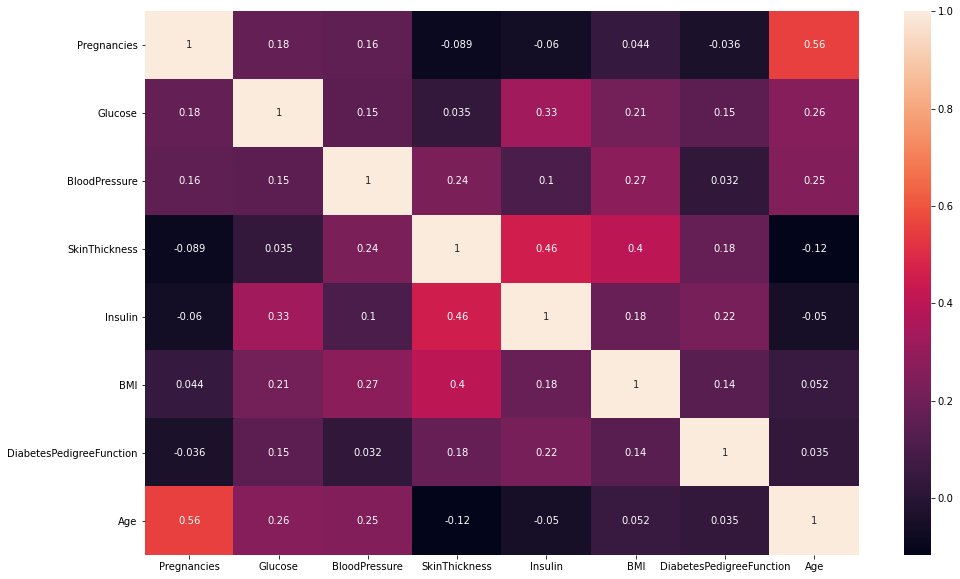

In [90]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1152 non-null   int64  
 1   Glucose                   1152 non-null   int64  
 2   BloodPressure             1152 non-null   int64  
 3   SkinThickness             1152 non-null   int64  
 4   Insulin                   1152 non-null   int64  
 5   BMI                       1152 non-null   float64
 6   DiabetesPedigreeFunction  1152 non-null   float64
 7   Age                       1152 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 72.1 KB


# Classification Models using sklearn 

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [93]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [94]:
#Scale the data.
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

c:\users\aziz ahmad\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\aziz ahmad\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\aziz ahmad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [95]:
rf = RandomForestClassifier()

In [96]:
rf.fit(X_train, y_train)

c:\users\aziz ahmad\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\aziz ahmad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [97]:
rf.score(X_train,y_train) 

0.99457111834962

In [98]:
y_pred =rf.predict(X_test)

In [99]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

# Deeplearning using ANN

In [100]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.optimizers import Adam

In [127]:
# Building the Model
classifier = Sequential() 
classifier.add(Dense(activation = "relu", input_dim = 8, units = 20, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 30, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))

classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform")) 
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] ) 
 
 

In [128]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 20)                180       
_________________________________________________________________
dropout_43 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_44 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_45 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 20)                420       
__________

In [129]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=200, batch_size=64)

Train on 921 samples, validate on 231 samples
Epoch 1/200
921/921 [==============================] - 2s 3ms/step - loss: 0.3985 - acc: 0.8122 - val_loss: 0.5776 - val_acc: 0.6537
Epoch 2/200
921/921 [==============================] - 0s 130us/step - loss: 0.4155 - acc: 0.8208 - val_loss: 0.5991 - val_acc: 0.6277
Epoch 3/200
921/921 [==============================] - 0s 173us/step - loss: 0.3908 - acc: 0.8241 - val_loss: 0.5435 - val_acc: 0.6883
Epoch 4/200
921/921 [==============================] - 0s 179us/step - loss: 0.3874 - acc: 0.8360 - val_loss: 0.5412 - val_acc: 0.6970
Epoch 5/200
921/921 [==============================] - 0s 169us/step - loss: 0.4144 - acc: 0.8241 - val_loss: 0.5621 - val_acc: 0.6797
Epoch 6/200
921/921 [==============================] - 0s 159us/step - loss: 0.4160 - acc: 0.8143 - val_loss: 0.5701 - val_acc: 0.6710
Epoch 7/200
921/921 [==============================] - 0s 252us/step - loss: 0.4225 - acc: 0.7980 - val_loss: 0.5832 - val_acc: 0.6494
Epoch 8/200

Epoch 61/200
921/921 [==============================] - 0s 197us/step - loss: 0.3971 - acc: 0.8187 - val_loss: 0.5557 - val_acc: 0.6883
Epoch 62/200
921/921 [==============================] - 0s 163us/step - loss: 0.4254 - acc: 0.8100 - val_loss: 0.5478 - val_acc: 0.6926
Epoch 63/200
921/921 [==============================] - 0s 145us/step - loss: 0.3853 - acc: 0.8263 - val_loss: 0.5448 - val_acc: 0.7013
Epoch 64/200
921/921 [==============================] - 0s 155us/step - loss: 0.3886 - acc: 0.8491 - val_loss: 0.5404 - val_acc: 0.7056
Epoch 65/200
921/921 [==============================] - 0s 200us/step - loss: 0.3914 - acc: 0.8404 - val_loss: 0.5478 - val_acc: 0.7013
Epoch 66/200
921/921 [==============================] - 0s 239us/step - loss: 0.4175 - acc: 0.8198 - val_loss: 0.5680 - val_acc: 0.6667
Epoch 67/200
921/921 [==============================] - 0s 160us/step - loss: 0.4118 - acc: 0.8371 - val_loss: 0.5784 - val_acc: 0.6537
Epoch 68/200
921/921 [==========================

921/921 [==============================] - 0s 139us/step - loss: 0.3920 - acc: 0.8306 - val_loss: 0.5613 - val_acc: 0.6797
Epoch 122/200
921/921 [==============================] - 0s 142us/step - loss: 0.4072 - acc: 0.8252 - val_loss: 0.5576 - val_acc: 0.6797
Epoch 123/200
921/921 [==============================] - 0s 167us/step - loss: 0.3798 - acc: 0.8317 - val_loss: 0.5212 - val_acc: 0.7229
Epoch 124/200
921/921 [==============================] - 0s 148us/step - loss: 0.4031 - acc: 0.8154 - val_loss: 0.5622 - val_acc: 0.6797
Epoch 125/200
921/921 [==============================] - 0s 151us/step - loss: 0.3930 - acc: 0.8274 - val_loss: 0.5725 - val_acc: 0.6580
Epoch 126/200
921/921 [==============================] - 0s 132us/step - loss: 0.3863 - acc: 0.8350 - val_loss: 0.5442 - val_acc: 0.6970
Epoch 127/200
921/921 [==============================] - 0s 162us/step - loss: 0.3935 - acc: 0.8447 - val_loss: 0.5381 - val_acc: 0.7013
Epoch 128/200
921/921 [==============================] 

Epoch 181/200
921/921 [==============================] - 0s 131us/step - loss: 0.3788 - acc: 0.8263 - val_loss: 0.5394 - val_acc: 0.6840
Epoch 182/200
921/921 [==============================] - 0s 162us/step - loss: 0.3609 - acc: 0.8545 - val_loss: 0.5336 - val_acc: 0.6883
Epoch 183/200
921/921 [==============================] - 0s 153us/step - loss: 0.4099 - acc: 0.8219 - val_loss: 0.5914 - val_acc: 0.6320
Epoch 184/200
921/921 [==============================] - 0s 134us/step - loss: 0.3781 - acc: 0.8306 - val_loss: 0.5414 - val_acc: 0.7013
Epoch 185/200
921/921 [==============================] - 0s 148us/step - loss: 0.4122 - acc: 0.8284 - val_loss: 0.5698 - val_acc: 0.6667
Epoch 186/200
921/921 [==============================] - 0s 176us/step - loss: 0.4012 - acc: 0.8295 - val_loss: 0.6019 - val_acc: 0.6320
Epoch 187/200
921/921 [==============================] - ETA: 0s - loss: 0.4043 - acc: 0.817 - 0s 155us/step - loss: 0.3999 - acc: 0.8187 - val_loss: 0.5647 - val_acc: 0.6753
Epo

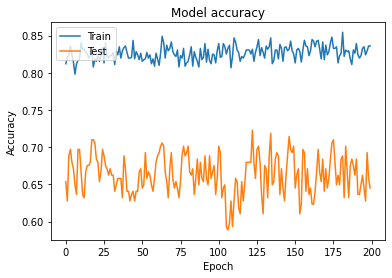

In [130]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [131]:
#Performing prediction and rescaling
y_pred = classifier.predict(X_test) 
y_pred = (y_pred > 0.5) 

In [133]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred) 
cm 


array([[148,   0],
       [ 83,   0]], dtype=int64)

In [134]:
#Accuracy
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1]) 
print(accuracy*100) 

64.06926406926407
